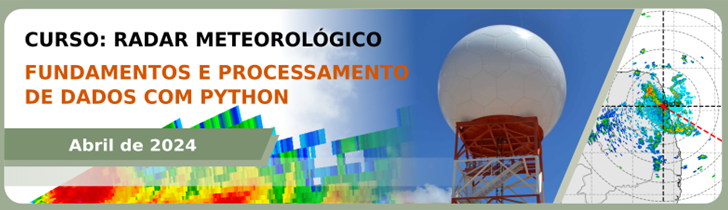

#`Tarefa 2 - 24/04/2024:` Plotando Plan Position Indicator (PPI) e produzindo/plotando Constant Altitude Plan Position Indicator (CAPPI)

- Este Colab contém as tarefas referentes ao segundo dia do curso - 24/04/2024.

- Todas as instruções e scripts são processados diretamente na nuvem, não sendo necessário instalar ferramentas ou fazer o download dos dados localmente no seu computador. Para rodar as células de código, click no ícone de `play` no lado esquerdo superior ou digite `ctrl enter` no seu teclado.

---

**OBJETIVO:** Aplicar os conceitos aprendidos na parte prática do curso sobre Plotando Plan Position Indicator (PPI) e Constant Altitude Plan Position Indicator (CAPPI).


---


**DADOS:** Usaremos os dados volumétricos (ou seja, contendo todos os Plan Position Indicator-PPIs) da refletividade corrigida (dBZ) do radar de Jaraguari (MS) pertencente ao CEMADEN. No script existe um passo-a-passo explicando como baixar os dados volumétricos do radar no [site do CEMADEN](http://www2.cemaden.gov.br/mapainterativo/).

---

**PROCEDIMENTO REALIZADO NESTE SCRIPT:** Os seguintes procedimentos serão realizados nesta tarefa:
1. 1° Passo: Instalação das bibliotecas
2. 2° Passo: Importando as bibliotecas
3. 3° Passo: Baixar os dados do radar do CEMADEN
4. 4° Passo: Declarando as funções
5. **EXERCÍCIO A)** - Plotando Plan Position Indicator (PPI)
6. **EXERCÍCIO B)** - Produzindo e plotando Constante Altitude Plan Position Indicator (CAPPI)


---

**PASSO-A-PASSO PARA REALIZAÇÃO DA ATIVIDADE**:

1.   Processar os Passos 1 e 2 do script.
2.   Baixar o arquivo volumétrico da refletividade corrigida de um horário do radar de Jaraguari (MS) como indicado no Passo 3.
3.   Processar o Passo 4.
4.   Realizar o Exercício A).
5.   Realizar o Exercício B).
---

**Equipe:**

Palestrantes/Tutores:

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Thiago Souza Biscaro - INPE: thiago.biscaro@inpe.br / https://github.com/tsbiscaro

Colaboradores:
 - Diego Souza - INPE: diego.souza@inpe.br / https://github.com/diegormsouza
 - Flávio Augusto - UNIFEI: augustoflaviobob@gmail.com
---

# **1° Passo:** Instalando bibliotecas

Neste passo instalaremos as bibliotecas necessárias para a execução dos scripts. Basicamente, as bibliotecas terão a seguinte finalidade:

*   **cartopy:** Trabalhar com mapas geográficos
*   **pyart:** Leitura e exibição dos dados do radar



O código abaixo instala o pacote condacolab e reinicia o ambiente automaticamente.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

Após processar a célula de código anterior, aparecerá a mensagem abaixo. Essa mensagem é normal aparecer ao instalar o pacote condacolab, e não afeta o prosseguimento das execuções da célula. Assim, basta fechar o aviso e seguir para próxima célula do código.

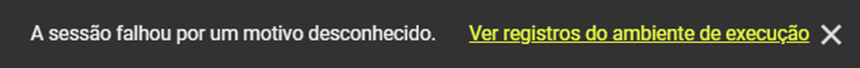

Instalação dos pacotes necessários.

In [ ]:
!mamba install -q -c conda-forge cartopy==0.21.1 arm_pyart==1.16.0

# **2° Passo:** Importando bibliotecas

Nesta etapa importaremos todas as bibliotecas necessárias para a nossa tarefa.

In [ ]:
import pyart                      # Biblioteca para trabalhar com dados de radar
import matplotlib.pyplot as plt   # Biblioteca para gerar gráficos
import geopy                      # Biblioteca para geocodificação
from geopy import distance        # Função para calculo de distância
import cartopy.crs as ccrs        # Biblioteca para trabalhar com projeções de mapas
import numpy as np                # Biblioteca para trabalhar com matrizes

# ignora avisos
import warnings
warnings.filterwarnings("ignore")

# **3° Passo:** Baixando os dados do radar do CEMADEN

Nesta etapa você deverá baixar o dado volumétrico de refletividade corrigida do radar de Jaraguari (MS) pertencente ao CEMADEN. Para isto, primeiramente você deverá acessar o [site](http://www2.cemaden.gov.br/mapainterativo/#) do CEMADEN e acessar a aba `Download de Dados` e em seguida clicar em `Radares`, como indicado na imagem a seguir:



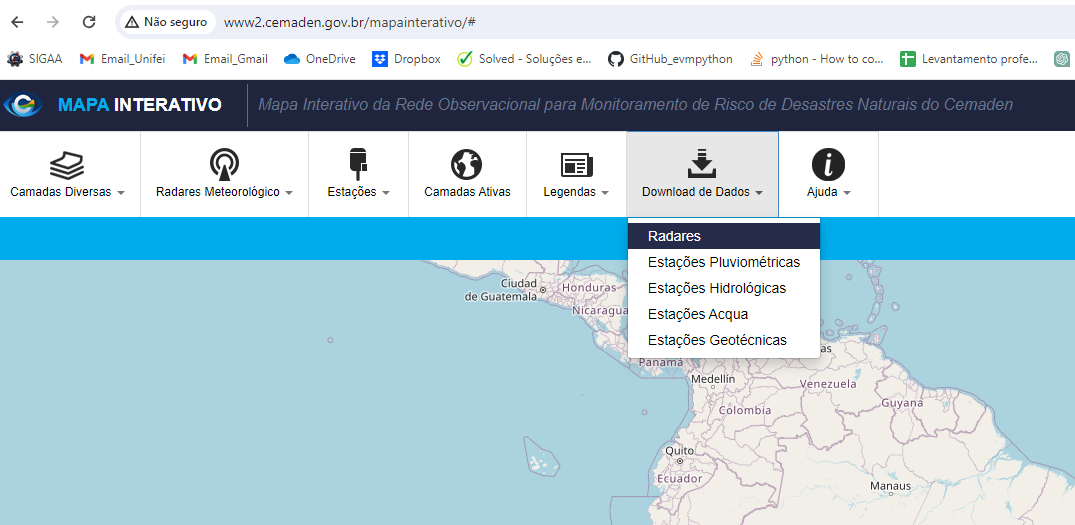

- Aparecerá uma lista com os nomes dos nove radares do CEMADEN. Em seguida você deverá acessar o link com o nome `2. jaraguari`, e clicar em `3. vol_250km_12steps.vol` e escolher o arquivo que contêm a refletividade corrigida, que esta com o final `dBZ.vol.h5`. No nosso exemplo abaixo, seria o arquivo `14. 2024021622300200dBZ.vol.h5`. Importante salientar que o CEMADEN atualmente disponíbiliza os dados de radar compreendendo o período da data atual até um mês atrás.

- Importante lembrar que não é necessário baixar especificamente o arquivo do radar com a data `2024021622300200dBZ.vol.h5`. Vocês poderão baixar o arquivo para qualquer data, porém o arquivo precisa conter a extensão `dBZ.vol.h5`.

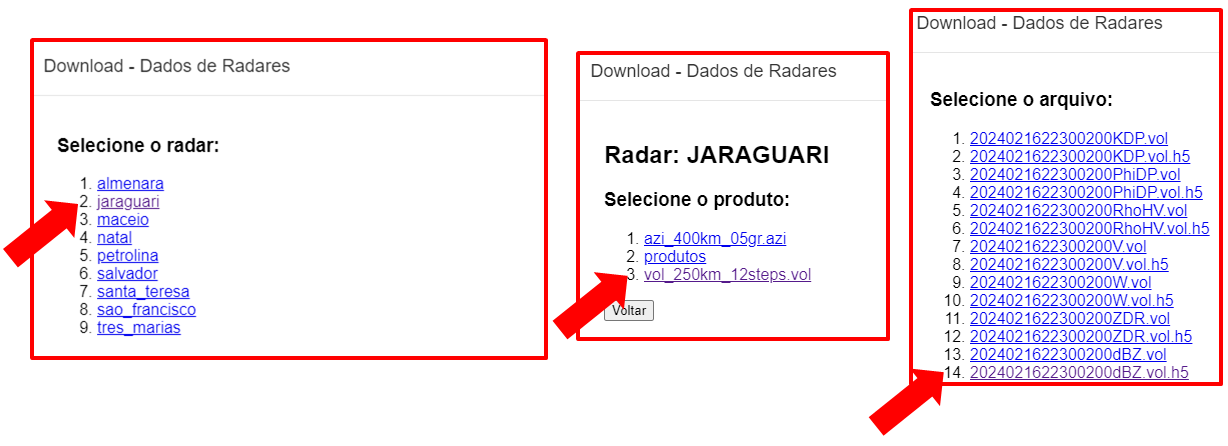

- Ao clicar no nome do arquivo, você deverá prencher o CAPTCHA e após esse procedimento o arquivo será baixado para o seu computador pessoal, no diretório de downloads.

- Após esse passo, você deverá fazer o upload do arquivo para a sua sesão do Colab. Para isto você deverá clicar na seta localizada na parte esquerda da sua tela do Colab, e em seguida escolher o arquivo que foi baixado na pasta downloads do seu computador, como indicado nas imagens a seguir:

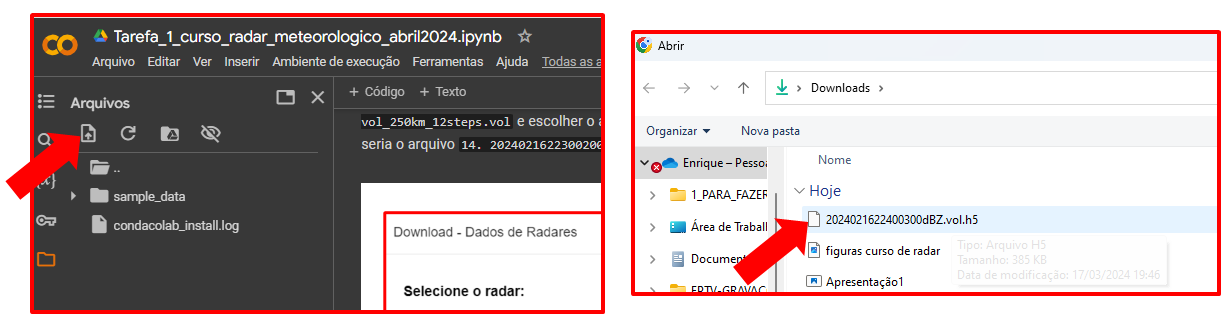

- Depois de fazer o upload do arquivo, veja que o arquivo ficará armazenado no `/content`, como indicado na imagem a seguir.

- Lembre-se que o  `/content` é a memória momentânea da sua sessão do Colab. O que significa que assim que você fechar a sua sessão do Colab, o arquivo irá ser excluído dessa sessão automaticamente.   

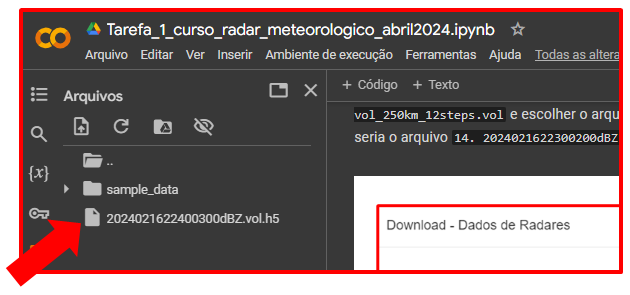

- Uma explicação detalhada dos tipos dos dados dos radares do CEMADEN e o que significa a nomenclatura dos arquivos podem ser acessado nesse [tutorial](https://github.com/evmpython/curso_radar_UNIFEI_INPE_2024/blob/main/doc/Acesso_a_Dados_CEMADEN_v2024-03-19.pdf) que preparamos.

- Agora já estamos com o arquivo volumétrico de refletividade corrigida do radar de Jaraguari (MS). Assim podemos começar a realizar o nossa Tarefa 2.

# **4° Passo:** Declarando funções

In [ ]:
#-----------------------------------------------------------------------------------
#  Função que calcula a latitude e longitude do azimute
#-----------------------------------------------------------------------------------
def calc_latlon_azimute(latitude_radar, longitude_radar, distancia_radar, azimute_escolhido):

    """
    Calcula a latitude e longitude de um segundo ponto no espaço

    Parâmetros de entrada:
                           latitude_radar (float): latitude do radar em graus
                           longitude_radar (float): longitude do radar em graus
                           distancia_radar (float)): distância do radar ao segundo ponto em km
                           azimute_escolhido (float): ângulo azimute em graus

    Parâmetros de saída:
                        lat_azimute (float): latitude do segundo ponto em graus
                        lon_azimute (float): longitude do segundo ponto em graus

    Exemplo:
             calc_latlon_azimute(-23.600795, -45.97279, 250, 120)

    """

    # importa funções
    import geopy
    from geopy import distance

    # given: lat1, lon1, b = bearing in degrees e d = distance in kilometers
    ponto_partida = geopy.Point(latitude_radar, longitude_radar)

    # calcula latitude e longitude do ponto 2
    destino = distance.distance(kilometers=distancia_radar).destination(ponto_partida, azimute_escolhido)
    lat_azimute, lon_azimute = destino.latitude, destino.longitude

    return lat_azimute, lon_azimute

#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral(aneis, lon_r, lat_r, color, label):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                           aneis (lista): tamanho do raio do círculo em km
                           lon_r (float): valor da longitude do centro do círculo em graus
                           lat_r (float): valor da latitude do centro do círculo em graus
                           color (str): cor do raio do círculo
                           label (str): legenda

    Parâmetros de saída:
                         latitude e longitude que delimitam os círculos de distância centrado no radar e plota os círculos

    Exemplo:
             evm_plota_aneis_em_geral([100], -45.97279, -23.600795, 'gray', label='Radar: 100 km')
    """

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color, label= label)



---


# **EXERCÍCIO A):** Plotando Plan Position Indicator (PPI)


---


**ENUNCIADO:** O objetivo deste exercício é o aluno produzir o mapa de PPI com uma seção transversal vertical. Iremos selecionar um ângulo azimute e plotar a seção vertical que percorre esse ângulo. Para isto usaremos a função [cross_section_ppi](https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.util.cross_section_ppi.html) e precisaremos apenas inserir os **dados volumétricos** do radar e o **azimute** escolhido. Para isto vocês utilizarão como referência o `Script 06` da aula prática. Para realizar esse exercício vocês  deverão fazer o seguinte passo-a-passo:

1.   Leitura do arquivo do radar. Insira o nome do arquivo que foi baixado. Por exemplo: `filename = '2024032118000300dBZ.vol.h5'`. Vocês deverão inserir o nome do arquivo que foi baixado e feito o upload no `/content/`, e que provavelmente será de uma data e horário diferente desse exemplo.

2.   Defina o ângulo azimute da seção vertical: Por exemplo `azi = 120`. Aqui você terá que escolher um valor do ângulo azimute que melhor se enquadre para sua tempestade.

3.   Na parte que plota a Figura 1 (PPI), usar as seguintes definições:
- Em `display.plot_ppi_map` defina as seguintes propriedades da figura:
     - índice do ângulo de elevação: defina a terceira elevação, `level = 2`
     - valor mínimo da refletividade: `vmin=20`
     - valor máximo da refletividade: `vmax=70`
     - nome da paleta de cores: `cmap='pyart_NWSRef`
     - nome na barra de cores: `colorbar_label='Refletividade Horizontal (dBZ)`

- Em `display.plot_range_rings` plotar os aneis de 100, 200 e 250 km.

4.   Na parte que plota a Figura 2 (corte), usar as seguintes definições:

- Em `display.plot` defina as seguintes propriedades da figura:
     - variável: `'reflectivity_horizontal'`
     - valor mínimo da refletividade: `vmin=20`
     - valor máximo da refletividade: `vmax=70`
     - nome da paleta de cores: `cmap='pyart_NWSRef`
     - nome na barra de cores: `colorbar_label='Refletividade Horizontal (dBZ)`

- Ao definir o nomes dos eixos da figuras defina as seguintes propriedades:
    - Inserir o título da figura: `Seção vertical`
    - Inserir o título do eixo X como `Distância (km) `.
    - Inserir o título do eixo Y como `Altura (km)`.

5. Mostrar a figura na tela.

6. Salvar a figura em PNG com 300 dpi de resolução e com o nome `Atividade_2_exercicio_a.png`.

`*OBSERVAÇÃO:` Dependendo do arquivo que foi escolhido pode ser que naquela imagem não tenha atividade convectiva. Nessa situação pode ser que a figura fique sem informação ou na cor branca.

In [ ]:
#========================================================================================================================#
#                                                LEITURA DADO DO RADAR
#========================================================================================================================#
# leitura do arquivo
filename =           # Exemplo: '2024032118000300dBZ.vol.h5'
radar = pyart.aux_io.read_odim_h5(f'/content/{filename}')

# extrai a latitude e longitude do radar
lat_radar, lon_radar =

# limites dos dados
latmin, latmax =
lonmin, lonmax =

# extrai a data do dado do radar
data =

#========================================================================================================================#
#                                                SEÇÃO TRANSVERSAL
#========================================================================================================================#
# escolha o ângulo azimute para fazer a seção transversal
azi =

# latitude e longitude do azimute escolhido
lat_azi, lon_azi = calc_latlon_azimute(lat_radar, lon_radar, 250, azi)

# função que produz a seção transversal
cross_section =

#========================================================================================================================#
#                                                PLOTA FIGURA
#========================================================================================================================#
# cria moldura da figura
fig = plt.figure(figsize=[13,5])

#==========================#
#     FIGURA 1: PPI
#==========================#
# moldura da figura
ax1 =

# define a elevação
level =

# extrai o ângulo de elevação da primeira elevação (level=0)
str_level =

# cria o display
display =

# plota o mapa
display.plot_ppi_map()

# plota as linhas transversais que passam pelo centro do radar
display.plot_line_geo()
display.plot_line_geo()

# plota aneis de distância
display.plot_range_rings()

 # indica a localização do radar com um ponto
display.plot_point()

# plota a linha do ângulo azimute
display.plot_line_geo()

# plota as linhas de latitude e longitudes
ax =
gl =
gl.xlabels_top =
gl.ylabels_right =

# título da figura
plt.title()
plt.title()

#==========================#
#     FIGURA 2: CORTE
#==========================#
# moldura da figura
ax2 =

# monta um objeto "display" do Py-ART
display =

# faz o plot
display.plot()

# seta os limites dos eixos x e y
display.set_limits()
display.set_limits()

# nome dos eixos x e y
plt.xlabel()
plt.ylabel()

# título figura
plt.title()
plt.title()

# recorta figura


# salva figura
plt.savefig()

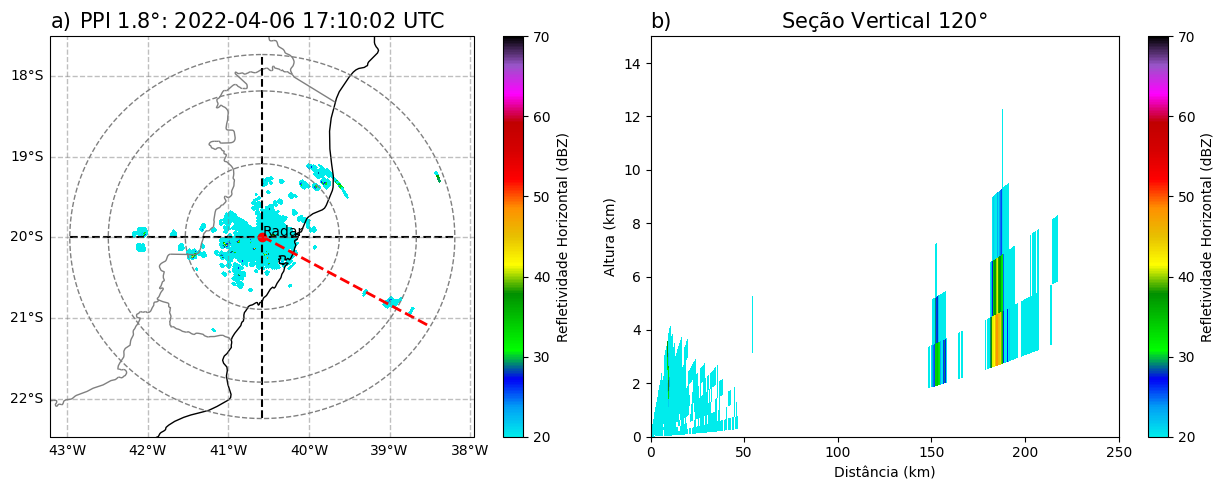

---


# **EXERCÍCIO B):** Produzindo e plotando Constant Altitude Plan Position Indicator (CAPPI)


---

**ENUNCIADO:** O objetivo deste exercício é o aluno produzir e plotar o CAPPI de 4000 m de altitude da refletividade horizontal. Para isto vocês utilizarão como referência o `Script 07` da aula prática. Para realizar esse exercício vocês  deverão fazer o seguinte passo-a-passo:

1.   Leitura do arquivo do radar. Insira o nome do arquivo que foi baixado. Por exemplo: `filename = '2022040617100200dBZ.vol.h5'`. Vocês deverão inserir o nome do arquivo que foi baixado e feito o upload no `/content/`, e que provavelmente será de uma data e horário diferente desse exemplo.

2.   Na função que realiza o cálculo do CAPPI `cappi = pyart.map.grid_from_radar` usar as seguintes definições:
     - dimensões da grade: `grid_shape=(2, 500, 500)`
     - limites da grade: `grid_limits=(
        (3000-altitude, 4000-altitude), (-250000, 250000), (-250000, 250000))`

3. Em `display.plot_grid` defina as seguintes propriedades da figura:
     - variável: `'reflectivity_horizontal'`
     - nível do CAPPI: `level=1`
     - valor mínimo da refletividade: `vmin=20`
     - valor máximo da refletividade: `vmax=70`
     - nome da paleta de cores: `cmap='pyart_NWSRef`
     - nome na barra de cores: `colorbar_label='Refletividade Horizontal (dBZ)`
  
4. Em `display.plot_range_rings` plotar os aneis de 100, 200 e 250 km.

5. No título da figura: `plt.title(f'CAPPI {int(display.grid.z["data"][1]) + altitude} m - Refletividade: {data}', fontsize=10)`

5. Mostrar a figura na tela.

6. Salvar a figura em PNG com 300 dpi de resolução e com o nome `Atividade_2_exercicio_b.png`.

`*OBSERVAÇÃO:` Dependendo do arquivo que foi escolhido pode ser que naquela imagem não tenha atividade convectiva. Nessa situação pode ser que a figura fique sem informação ou na cor branca.

In [ ]:
#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename =         # Exemplo: '2024032118000300dBZ.vol.h5'
radar = pyart.aux_io.read_odim_h5(f'/content/{filename}')

# extrai a latitude, longitude do radar e altitude do radar
lat_radar, lon_radar =
altitude =

# limites dos dados
latmin, latmax =
lonmin, lonmax =

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                             GERA O CAPPI
#========================================================================================================================#
# gera CAPPI
cappi = pyart.map.grid_from_radars()

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define o tamanho da figura
fig =

# define os eixos e projeção da figura
ax =

# monta um objeto "display" do Py-ART
display =

# plota o cappi
display.plot_grid()

# plotas as linhas passando pelo radar
display.plot_crosshairs()

# plota os aneis de distância do radar
evm_plota_aneis_em_geral(='')

# título da figura
plt.title()

# nome dos eixos x e y
ax.set_xlabel()
ax.set_ylabel()

# recorta figura


# salva figura
plt.savefig()

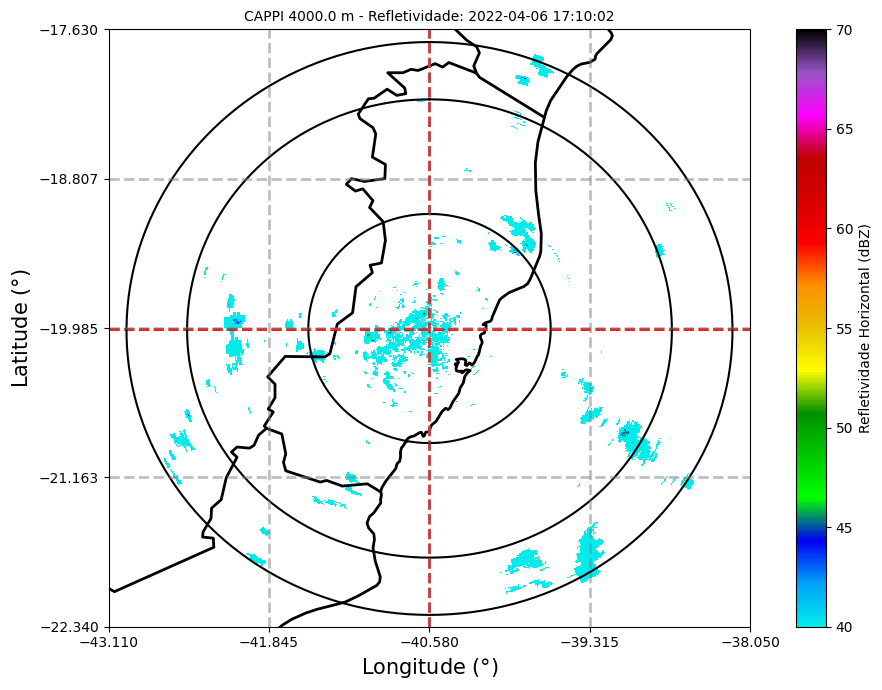